In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data

data = pd.read_csv('house_price_full+(2).csv')
data.shape

(499, 3)

In [3]:
data.head()

,bedrooms,sqft_living,price
0,3,1340,313000
1,5,3650,2384000
2,3,1930,342000
3,3,2000,420000
4,4,1940,550000


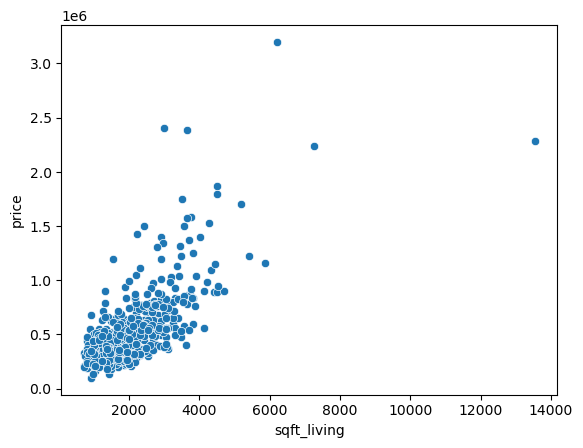

In [4]:
# distribution of sqft_living and price

sns.scatterplot(data=data, x='sqft_living', y='price')
plt.show()

In [5]:
# create X and y

X = data.drop(columns='price', axis=1)
y = data['price']

In [6]:
# perform standard scaling in X

scaler = StandardScaler()
cols = X.columns
X[cols] = scaler.fit_transform(X[cols])
X.head()

,bedrooms,sqft_living
0,-0.433198,-0.753258
1,1.675735,1.457330
2,-0.433198,-0.188649
3,-0.433198,-0.121661
4,0.621269,-0.179079


In [7]:
# perform log transformation on y

y = np.log(y)
y[0:5]

0    12.653958
1    14.684290
2    12.742566
3    12.948010
4    13.217674
Name: price, dtype: float64

In [8]:
# split into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [9]:
X_train.shape, X_test.shape

((349, 2), (150, 2))

In [10]:
# build model using keras

model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X.shape[-1], )),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# compile the model

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(), metrics=['mse'])

In [25]:
# train the model

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 119.1133 - r2_score: -475.2560 - val_loss: 10.9120 - val_r2_score: -46.5241
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.2297 - r2_score: -104.2839 - val_loss: 16.8575 - val_r2_score: -72.4184
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.5948 - r2_score: -99.4716 - val_loss: 5.2519 - val_r2_score: -21.8734
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.1482 - r2_score: -66.6956 - val_loss: 4.3235 - val_r2_score: -17.8296
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.2005 - r2_score: -78.5535 - val_loss: 4.0755 - val_r2_score: -16.7496
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.3888 - r2_score: -66.4956 - val_loss: 3.7234 - val_r2_score: -15.2163
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7158 - r2_score: -59.7393 - val_loss: 3.7108 - val_r2_score: -15.1615
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0801 - r2_score:

In [48]:
# predictions on train set

y_train_pred = model.predict(X_train)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [49]:
# accuracy on train set

r2_score(y_train, y_train_pred)

0.35548624204267554

In [50]:
# predictions on test set

y_test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [51]:
# accuracy on test set

r2_score(y_test, y_test_pred)

0.35640917787096926